✅ File created at: /content/ecommerce_data.csv

📊 Dataset Preview:
   OrderID     Product     Category  Price  Quantity  TotalAmount  \
0     1001       Phone  Electronics    699         1          699   
1     1002      Laptop  Electronics   1200         1         1200   
2     1003  Headphones  Accessories    199         2          398   
3     1004      Camera  Electronics    499         1          499   
4     1005       Shoes      Fashion    120         3          360   

  CustomerLocation  Rating  
0         New York     4.5  
1       California     4.7  
2            Texas     4.3  
3          Florida     4.6  
4         New York     4.2  


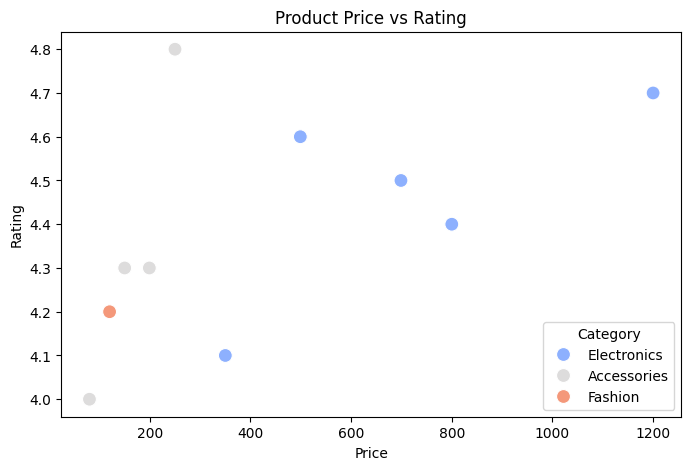


✅ Model Accuracy: 1.0

📈 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



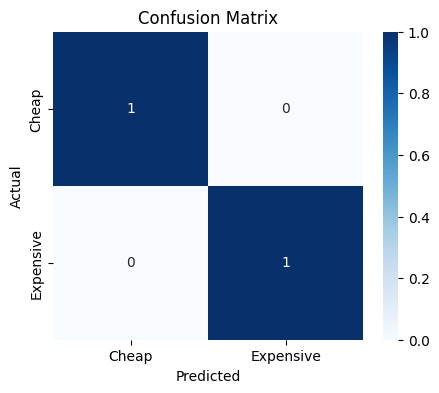

In [1]:
!pip install pandas scikit-learn matplotlib seaborn --quiet

# ✅ Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Step 3: Create the Data
data = {
    "OrderID": [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    "Product": ["Phone", "Laptop", "Headphones", "Camera", "Shoes", "Tablet", "Watch", "TV", "Speaker", "Mic"],
    "Category": ["Electronics", "Electronics", "Accessories", "Electronics", "Fashion",
                 "Electronics", "Accessories", "Electronics", "Accessories", "Accessories"],
    "Price": [699, 1200, 199, 499, 120, 350, 250, 800, 150, 80],
    "Quantity": [1, 1, 2, 1, 3, 1, 2, 1, 2, 5],
    "TotalAmount": [699, 1200, 398, 499, 360, 350, 500, 800, 300, 400],
    "CustomerLocation": ["New York", "California", "Texas", "Florida", "New York",
                         "Texas", "California", "Florida", "New York", "Texas"],
    "Rating": [4.5, 4.7, 4.3, 4.6, 4.2, 4.1, 4.8, 4.4, 4.3, 4.0]
}

# ✅ Step 4: Convert to DataFrame
df = pd.DataFrame(data)

# ✅ Step 5: Save as CSV in Google Colab Storage
file_path = "/content/ecommerce_data.csv"
df.to_csv(file_path, index=False)

print(f"✅ File created at: {file_path}")

# ✅ Step 6: Load Data from CSV
df = pd.read_csv(file_path)

# ✅ Step 7: Display the first few rows
print("\n📊 Dataset Preview:")
print(df.head())

# ✅ Step 8: Data Analysis (Visualizing Price vs Rating)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Price"], y=df["Rating"], hue=df["Category"], palette="coolwarm", s=100)
plt.title("Product Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

# ✅ Step 9: Feature Engineering for Machine Learning
df["Expensive"] = (df["Price"] > 500).astype(int)  # 1 if Price > 500, else 0

# Selecting Features and Target
X = df[["Price", "Quantity", "Rating"]]  # Independent Variables
y = df["Expensive"]  # Target Variable (Binary Classification)

# ✅ Step 10: Split the Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 11: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Step 12: Make Predictions
y_pred = model.predict(X_test)

# ✅ Step 13: Evaluate the Model
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 14: Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', xticklabels=["Cheap", "Expensive"], yticklabels=["Cheap", "Expensive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
